In [37]:
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pickle

In [2]:
df = pd.read_csv('c:\\Users\\Abize\\OneDrive\\Bureau\\Etienne_diane_phileas\\APICars\\data\\RAW\\cars.csv', index_col="car_ID")
df_copy = df.copy()

In [24]:
X = df[['curbweight']]
y = df[['price']]

In [26]:
sns.set(rc = {'figure.figsize': (10, 5)})

Score de la regression simple R^2 0.6977342414446954


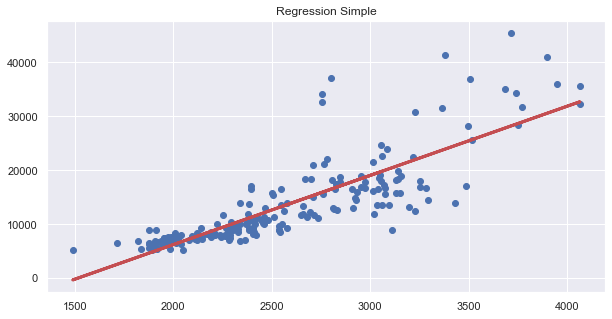

In [27]:
# Regression simple
model_lineaire = LinearRegression().fit(X, y);
y_pred = model_lineaire.predict(X);
print("Score de la regression simple R^2", model_lineaire.score(X, y))
plt.scatter(X, y);
plt.plot(X, y_pred, c='r', lw=3);
plt.title("Regression Simple");

In [45]:
# Regression multiple avec une division "cross validation simple"
X = df[['curbweight','enginesize']]
y = df[['price']]

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)
entrainement = model.fit(X_train, y_train)
score_entrainement = model.score(X_train, y_train)
y_pred = model.predict(X_test)
print(X.shape)
print("*******************")
#70% des donnees
print(X_train.shape) 
#30% des donnees
print(X_test.shape)  
print("*******************")
print(y_train.shape)
print(y_test.shape)


(205, 2)
*******************
(143, 2)
(62, 2)
*******************
(143, 1)
(62, 1)


In [22]:
print('train score:', score_entrainement)
print("******************************")
print("Valeur predict :" , y_pred)
print("******************************")

print("Juste voir")
test_entrainement = model.fit(X_test, y_test) 
score_test = model.score(X_test, y_test)
print('test score:', score_test)
print("******************************")
print("Valeur de depart :", y_test)

train score: 0.7546763537732167
******************************
Valeur predict : [[ 9732.9922308 ]
 [ 9532.43715385]
 [ 5963.09232889]
 [ 8466.40407178]
 [ 7704.29477937]
 [25339.95559517]
 [11608.69540246]
 [ 7860.21661349]
 [ 6279.52367252]
 [31305.91124715]
 [ 6318.17091073]
 [ 9773.83513478]
 [ 6279.52367252]
 [22988.23980282]
 [35629.24914208]
 [ 9938.00408723]
 [ 7646.35664603]
 [10008.58067045]
 [ 7909.30663581]
 [ 9127.60210905]
 [20765.70516766]
 [21936.43984372]
 [ 6371.65226458]
 [10102.90492828]
 [11871.64539224]
 [14707.62092362]
 [19880.93626741]
 [13068.25796072]
 [18343.34734414]
 [22092.42712579]
 [ 6002.47145569]
 [15591.72338324]
 [17091.59330076]
 [40869.48162614]
 [ 7360.92641495]
 [ 8328.97579625]
 [10378.49336793]
 [31060.78837532]
 [15502.58779349]
 [13932.27218867]
 [ 8136.60238968]
 [13414.42298359]
 [13187.12722971]
 [10792.97386029]
 [ 7829.08460503]
 [ 9946.18575762]
 [26042.92476889]
 [12049.91657175]
 [12968.74503481]
 [ 8587.46900654]
 [10859.82555261]
 [

In [51]:
# Regression avec 2 variables
model_multiple = LinearRegression().fit(X, y);
y_pred = model_multiple.predict(X);
print("Score de la regression simple R^2 :",model_multiple.score(X, y))

Score de la regression simple R^2 : 0.7945836303808418


In [48]:
X = df[['curbweight','enginesize']]
y = df[['price']]

ss = StandardScaler()
#Les deux variables Possedes la MEME echelle
X_ss = ss.fit_transform(df[['enginesize', 'curbweight']])

# Mettre à la meme echelle X_train
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# Mettre à la meme echelle y_train
y_train_ss = ss.fit_transform(y_train)
y_test_ss = ss.transform(y_test)

model_multiple.fit(X_train_ss, y_train) 
y_pred = model_multiple.predict(X_test_ss);
model_multiple.score(X_test_ss, y_test)


0.8599569644323289

In [ ]:
# Enregistrement du model
file = 'LinearRegressionMultiple.sav'
pickle.dump(model_multiple, open(file, 'wb'))